In [0]:
! wget https://pastebin.com/raw/SRmKpHFA

--2019-02-04 17:29:50--  https://pastebin.com/raw/SRmKpHFA
Resolving pastebin.com (pastebin.com)... 104.20.208.21, 104.20.209.21, 2606:4700:10::6814:d015, ...
Connecting to pastebin.com (pastebin.com)|104.20.208.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘SRmKpHFA.1’

SRmKpHFA.1              [ <=>                ]  17.88K  --.-KB/s    in 0.002s  

2019-02-04 17:29:50 (7.94 MB/s) - ‘SRmKpHFA.1’ saved [18304]



In [0]:
! cat SRmKpHFA|head

words,notes
A,G
dream,Bb
is,A
a,Bb
wish,G#
your,D#
heart,F#
makes,D#
When,Bb


In [0]:
import numpy as np

charDict = {}
labelDict = {}
indToLabel = {}
labelCount =  0
indiCount = {}
count = 1
X = []
Y = np.random.randint(0,155, size=(1989))
#Y = []

CHAR_COUNT = 5

def charToDict(text):
  global count
  for I in text:
    if not charDict.get(I,None):
      charDict[I] = count
      count += 1 

def toNumber(text):
  x = np.zeros(CHAR_COUNT)
  for C,I in enumerate(text[:CHAR_COUNT]):
    x[C] = charDict[I]
  return x
      
with open("SRmKpHFA","r") as inp:
  first = True
  readData = inp.read().split("\n")
  for line in readData:
    if first:
      first = False
      continue
    data = line.split(",")
    charToDict(data[0])
    if (not labelDict.get(data[1],None)):
      labelDict[data[1]] = labelCount
      labelCount += 1
      indToLabel[labelCount] = data[1]
      indiCount[data[1]] = 1
    else:
      indiCount[data[1]] +=1 
    X.append(toNumber(data[0])) 
    #Y.append(labelDict[data[1]])
    

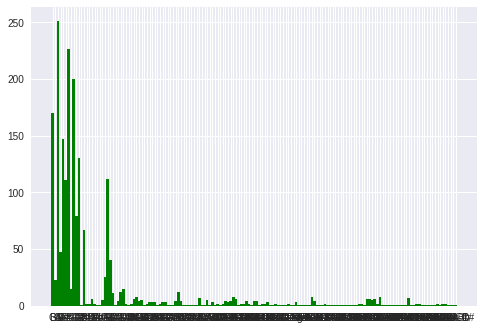

In [0]:
import matplotlib.pyplot as plt

plt.bar(indiCount.keys(), indiCount.values(), 1, color='g')
plt.show()



In [0]:
X = np.array(X)
Y = np.array(Y)

print (X.shape,Y.shape)


(1989, 5) (1989,)


In [0]:
print (len(charDict),len(labelDict))

63 155


In [0]:
print (labelDict)

{'G': 13, 'Bb': 1, 'A': 2, 'G#': 3, 'D#': 4, 'F#': 5, 'B': 6, 'D#-C#': 7, 'C#': 8, 'E#': 9, '-': 10, 'E#-G#-F#': 11, '"': 12, 'F#-D#': 14, 'G#-F#': 15, 'B-C#': 16, 'B#b': 17, 'B#b-G#': 18, 'D#-G#-F#': 19, 'A-A': 20, 'F': 21, 'E': 22, 'D': 23, 'C': 24, 'F-F': 25, 'D-E': 26, 'C#-C#': 27, 'C#-B': 28, 'C#-A': 29, 'G-DE': 30, 'E#-D#-C#-B': 31, 'D#-E#': 32, 'B-A': 33, 'A-G': 34, 'C#-B-A': 35, 'G-D': 36, 'A-G#-F#': 37, 'C#-B-A-G#': 38, 'G#-A': 39, 'C#-E#': 40, 'C#-E#-E#-E#': 41, 'A#': 42, 'E#-E#': 43, 'D#-C#-B': 44, 'G#-A-A': 45, 'B-C#-C#': 46, 'E#-F#': 47, 'C#-D#': 48, 'E#-D#': 49, 'G#-G#': 50, 'B-Bb': 51, 'B-G#': 52, 'F#-D#-C#': 53, 'C#-C#-B': 54, 'A-G-F#': 55, 'B-': 56, 'A-B': 57, 'B-A-G': 58, 'C#-C#-C#': 59, 'A-C#': 60, 'B-A-B': 61, '~': 62, 'C#-B-A-B': 63, '-C#': 64, 'BAB': 65, 'F#-ED': 66, 'D#-A': 67, 'AGF#-ED': 68, 'G-F#': 69, 'A-F#': 70, 'F#-E-ED': 71, 'AGF#ED': 72, 'AGF#-EDED': 73, 'BC#BA': 74, 'E-F#': 75, 'DC#': 76, 'C#B': 77, 'D#-D#D#': 78, 'D#-D#-C#': 79, 'C#-A-C#': 80, 'D#-D#': 8

In [0]:
from keras.models import Sequential, load_model
from keras.layers import *
from keras.layers import LSTM
from keras.optimizers import Adam

def modelling():
    model = Sequential()
    model.add(Embedding(len(charDict)+1, 32, input_length=CHAR_COUNT))
    model.add(LSTM(1024))
    model.add(Dense(len(labelDict)+1))
    model.add(Activation('softmax'))

    optimizer = Adam(lr=0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,metrics =['acc'])
    return model


Using TensorFlow backend.


In [0]:
model = modelling()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5, 32)             2048      
_________________________________________________________________
lstm_1 (LSTM)                (None, 1024)              4329472   
_________________________________________________________________
dense_1 (Dense)              (None, 156)               159900    
_________________________________________________________________
activation_1 (Activation)    (None, 156)               0         
Total params: 4,491,420
Trainable params: 4,491,420
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(X, Y,validation_split=0.1, batch_size=128, epochs=3)

NameError: ignored

In [0]:
prob = model.predict(toNumber("tree").reshape(1,CHAR_COUNT))
print (indToLabel[np.argmax(prob)],np.argmax(prob))

A-B 58


In [0]:
sent = "you are my love and my life girl your lips the moonlight i was a spin the stars and so when i say i love it all the blues i wish a spark of my heart when you say i was a said a spring and the star"
sent = sent.split(" ")
for  word in sent:
  prob = model.predict(toNumber(word).reshape(1,CHAR_COUNT))
  print ("{} -- {}".format(word,indToLabel[np.argmax(prob)]))

you -- C#-A-C#
are -- D#-A
my -- D#-A
love -- D#-A
and -- D#-A
my -- D#-A
life -- D#-A
girl -- A-B
your -- G-F#
lips -- D#-A
the -- D#-A
moonlight -- D#-A
i -- B-G
was -- D#-A
a -- B-G
spin -- C#-A-C#
the -- D#-A
stars -- C#-A-C#
and -- D#-A
so -- D#-A
when -- A-B
i -- B-G
say -- D#-A
i -- B-G
love -- D#-A
it -- D#-A
all -- D#-A
the -- D#-A
blues -- A-B
i -- B-G
wish -- D#-A
a -- B-G
spark -- C#-A-C#
of -- D#-A
my -- D#-A
heart -- C#-A-C#
when -- A-B
you -- C#-A-C#
say -- D#-A
i -- B-G
was -- D#-A
a -- B-G
said -- C#-A-C#
a -- B-G
spring -- C#-A-C#
and -- D#-A
the -- D#-A
star -- C#-A-C#


In [0]:
sent = "you are my love and my life girl your lips the moonlight i was a spin the stars and so when i say i love it all the blues i wish a spark of my heart when you say i was a said a spring and the star"
sent = sent.split(" ")
for  word in sent:
  prob = model.predict(toNumber(word).reshape(1,CHAR_COUNT))
  print ("{}".format(indToLabel[np.argmax(prob)]))

C#-A-C#
D#-A
D#-A
D#-A
D#-A
D#-A
D#-A
A-B
G-F#
D#-A
D#-A
D#-A
B-G
D#-A
B-G
C#-A-C#
D#-A
C#-A-C#
D#-A
D#-A
A-B
B-G
D#-A
B-G
D#-A
D#-A
D#-A
D#-A
A-B
B-G
D#-A
B-G
C#-A-C#
D#-A
D#-A
C#-A-C#
A-B
C#-A-C#
D#-A
B-G
D#-A
B-G
C#-A-C#
B-G
C#-A-C#
D#-A
D#-A
C#-A-C#
